In [4]:
import pandas as pd
import numpy  as np


In [5]:
df = pd.read_csv('AB_NYC_2019.txt')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

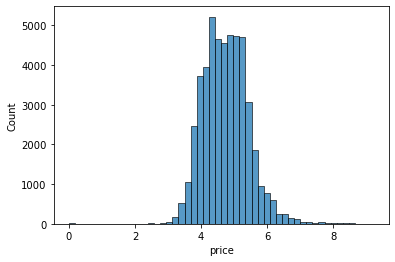

In [9]:
sns.histplot(np.log1p(df.price), bins=50)


In [10]:
df = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [11]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.minimum_nights.median()

3.0

In [13]:
n = len(df)
n

48895

In [14]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df = df.iloc[idx].reset_index(drop=True)

In [17]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
48890,40.84650,-73.94319,60,1,0,NaN,1,0
48891,40.73957,-74.00082,85,2,4,1.90,1,76
48892,40.78318,-73.97372,130,30,1,0.34,5,261
48893,40.77508,-73.97990,150,2,11,0.13,1,2


In [18]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test


In [19]:
n_train, n_val, n_test

(29337, 9779, 9779)

In [20]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[-n_test:]

In [21]:
print(len(df_train), len(df_val), len(df_test))

29337 9779 9779


In [22]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [23]:
del df_train['price']
del df_val['price']
del df_test['price']

In [24]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
df_train.columns.size


7

In [26]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [27]:
df_train_nazero = df_train.fillna(0)

In [28]:
df_train_nazero.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [29]:
X_train_nazero = np.array(df_train_nazero)
X_train_nazero

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
w_0, w = train_linear_regression(X_train_nazero,y_train)
y_pred_nazero =w_0 + X_train_nazero.dot(w)

In [51]:
y_pred_nazero

array([4.7827747 , 4.45947456, 4.89702083, ..., 4.82048871, 4.86944871,
       4.61612559])

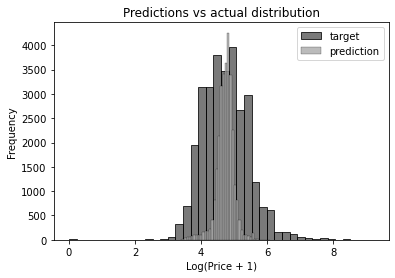

In [47]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_nazero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [38]:
df_train_means = df_train.fillna(df_train.reviews_per_month.mean())
X_train_means = np.array(df_train_means)
X_train_means

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [39]:
w_0 ,w  = train_linear_regression(X_train_means,y_train)

In [48]:
y_pred_means = w_0 + X_train_means.dot(w)

In [49]:
y_pred_means

array([4.7827747 , 4.4481776 , 4.89702083, ..., 4.82048871, 4.86944871,
       4.61612559])

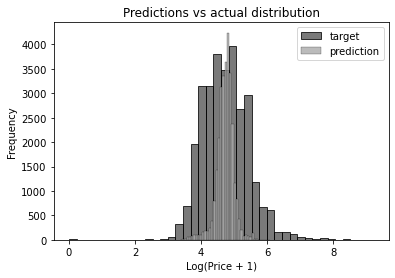

In [50]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_means, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [54]:
round(rmse(y_train, y_pred_nazero),2)


0.64

In [55]:
round(rmse(y_train,y_pred_means),2)

0.64

In [56]:
X_val = np.array(df_val)

In [67]:
w_0 ,w  = train_linear_regression(X_train_means,y_train)
y_val_pred = w_0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.6429182536998099

In [61]:
rmse(y_val, y_val_pred)

nan

In [63]:
df_val = df_val.fillna(0)


In [64]:
X_val = df_val.values

In [70]:
w_0 ,w  = train_linear_regression(X_train_nazero,y_train)
y_val_pred = w_0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.6430337788640698

# Regularization

In [71]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [77]:
list_of_rmse = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0 ,w  = train_linear_regression_reg(X_train_nazero,y_train,r)
    y_val_pred = w_0 + X_val.dot(w)
    print(r, ' - ' ,rmse(y_val, y_val_pred))
    list_of_rmse.append(rmse(y_val, y_val_pred))

0  -  0.6430337788640698
1e-06  -  0.6430341157503514
0.0001  -  0.6430723153756869
0.001  -  0.6437669735718055
0.01  -  0.655752842786336
0.1  -  0.6773299642476267
1  -  0.6823116950155929
5  -  0.682791572783955
10  -  0.6828430212103209


In [78]:
list_of_rmse

[0.6430337788640698,
 0.6430341157503514,
 0.6430723153756869,
 0.6437669735718055,
 0.655752842786336,
 0.6773299642476267,
 0.6823116950155929,
 0.682791572783955,
 0.6828430212103209]

In [79]:
min(list_of_rmse)

0.6430337788640698

# Q5

In [96]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df = df.iloc[idx].reset_index(drop=True)
    n_val = int(len(df)*0.2)
    n_test = int(len(df)*0.2)
    n_train = len(df) - n_val - n_test
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[-n_test:]
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    df_train = df_train.fillna(0)
    X_train = df_train.values
    df_val = df_val.fillna(0)
    X_val = df_val.values
    w_0 ,w  = train_linear_regression(X_train,y_train)
    y_val_pred = w_0 + X_val.dot(w)
    print(s, ' - ' ,rmse(y_val, y_val_pred))
    list_of_rmse.append(rmse(y_val, y_val_pred))

0  -  0.6547328360485041
1  -  0.6517792424305614
2  -  0.6373702644894373
3  -  0.6510604570436799
4  -  0.6386358543858655
5  -  0.6571228445090396
6  -  0.6454631211093897
7  -  0.6460084805508681
8  -  0.6489447886953802
9  -  0.6428748682942353


In [97]:
round(np.std(list_of_rmse),3)

0.008

# Q6

In [125]:
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df = df.iloc[idx].reset_index(drop=True)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[-n_test:]
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
del df_train['price']
del df_val['price']
del df_test['price']
df_full_train = pd.concat([df_train, df_val])

In [130]:
df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)
X_full_train = df_full_train.values
X_test = df_test.values

In [131]:
X_full_train

array([[ 4.082060e+01, -7.393779e+01,  5.000000e+00, ...,  1.600000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.072546e+01, -7.400036e+01,  3.000000e+00, ...,  2.800000e-01,
         2.000000e+00,  3.000000e+00],
       [ 4.078923e+01, -7.396802e+01,  3.000000e+01, ...,  1.000000e+00,
         1.000000e+00,  3.000000e+01],
       ...,
       [ 4.074421e+01, -7.398007e+01,  3.000000e+00, ...,  1.000000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.066223e+01, -7.395955e+01,  2.000000e+00, ...,  6.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.071115e+01, -7.393735e+01,  1.000000e+00, ...,  3.900000e-01,
         2.000000e+00,  0.000000e+00]])

In [132]:
y_full_train = np.concatenate([y_train,y_val])


In [133]:
wo, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.001)
y_test_pred = wo + X_test.dot(w)
rmse(y_test, y_test_pred)

0.6507240298929252